In [3]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")

In [20]:
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [7]:
df.tail(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [15]:
# To just get Albany region:
albany_df = df[ df["region"] == "Albany" ]
albany_df.tail(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.0,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.0,3831.78,3831.78,0.00,0.0,organic,2018,Albany
17612,11,2018-01-07,1.54,4816.90,43.51,412.17,0.0,4361.22,4357.89,3.33,0.0,organic,2018,Albany


In [16]:
# We want date as the index, not meaningless number
albany_df = albany_df.set_index("Date") # or avoid reassignment with albany_df.set_index("Date", inplace=True)
albany_df.head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


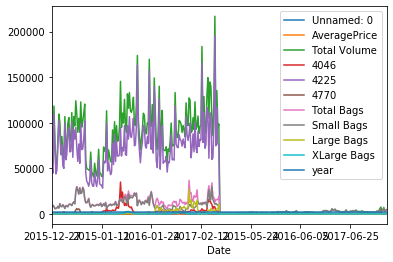

In [18]:
albany_df['AveragePrice'].plot()

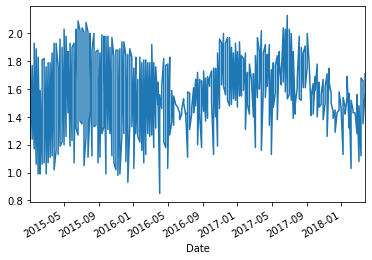

In [21]:
# pandas doesn't realise Date column is a datetime object
# assign the Date column to the correct datetime objects
df["Date"] = pd.to_datetime(df["Date"])
albany_df = df[ df["region"] == "Albany" ]
albany_df.set_index("Date", inplace=True)
albany_df['AveragePrice'].plot()

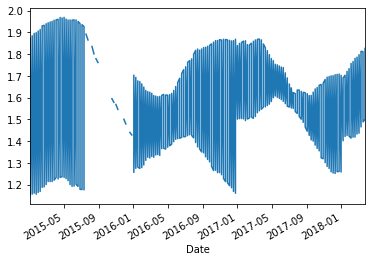

In [22]:
# average the stuff to look less messy
albany_df["AveragePrice"].rolling(25).mean().plot()

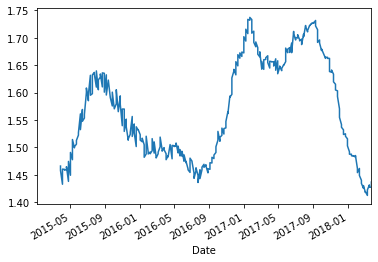

In [26]:
albany_df.sort_index(inplace=True)
albany_df["AveragePrice"].rolling(25).mean().plot()

In [27]:
albany_df["price25mn"] = albany_df["AveragePrice"].rolling(25).mean()
albany_df.head(3)

c:\users\dcblu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25mn
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [28]:
# or remove NaNs with albany_df.dropna().head(3)
albany_df.tail(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25mn
Date,,,,,,,,,,,,,,
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [29]:
# to get rid of the warning do
albany_df = df.copy()[df["region"] == "Albany"]
albany_df["price25mn"] = albany_df["AveragePrice"].rolling(25).mean()
albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)

In [31]:
# easier way...
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [43]:
# create a dataframe with all the regions so we can plot and compare
graph_df = pd.DataFrame()

# this will probably run for a long time and eat up your ram
for region in df["region"].unique():
    print(region)
    region_df = df.copy()[df["region"] == region]
    region_df.set_index("Date").sort_index(inplace=True)
    # with a unique columnname
    region_df[f"{region}_price25mn"] = region_df["AveragePrice"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25mn"]] # 2 brackets denotes a datagrame and not a series
    else:
        # join them
        graph_df = graph_df.join(region_df[f"{region}_price25mn"])
    

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


In [59]:
# fix duplicate datetimes due to types duplicating them
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df = df.copy()[df["type"]=="organic"]
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values(by="Date", ascending=True, inplace=True)
df.set_index("Date", inplace=True)
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
2015-01-04,51,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
2015-01-04,51,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
2015-01-04,51,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
2015-01-04,51,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [60]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
    region_df = df.copy()[df['region']==region]
    region_df[f"{region}_price25mn"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25mn"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25mn"])

graph_df.tail()

,California_price25mn,LasVegas_price25mn,PhoenixTucson_price25mn,BuffaloRochester_price25mn,Spokane_price25mn,LosAngeles_price25mn,Philadelphia_price25mn,Boston_price25mn,StLouis_price25mn,Louisville_price25mn,...,Houston_price25mn,Chicago_price25mn,Plains_price25mn,Indianapolis_price25mn,SouthCentral_price25mn,Columbus_price25mn,Albany_price25mn,Detroit_price25mn,NewOrleansMobile_price25mn,NewYork_price25mn
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


In [61]:
graph_df.tail()

,California_price25mn,LasVegas_price25mn,PhoenixTucson_price25mn,BuffaloRochester_price25mn,Spokane_price25mn,LosAngeles_price25mn,Philadelphia_price25mn,Boston_price25mn,StLouis_price25mn,Louisville_price25mn,...,Houston_price25mn,Chicago_price25mn,Plains_price25mn,Indianapolis_price25mn,SouthCentral_price25mn,Columbus_price25mn,Albany_price25mn,Detroit_price25mn,NewOrleansMobile_price25mn,NewYork_price25mn
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


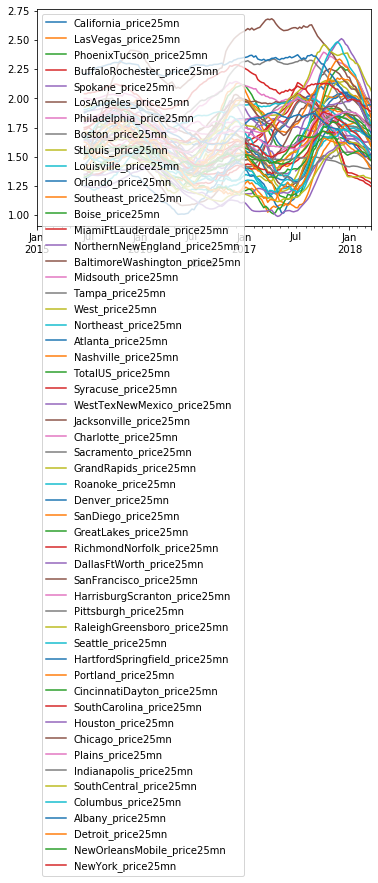

In [62]:
graph_df.plot()

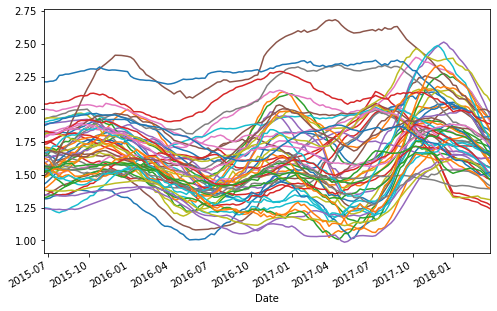

In [64]:
graph_df.dropna().plot(figsize=(8,5), legend=False)